<a href="https://colab.research.google.com/github/noushadkhan01/ML-and-DL-by-SuperDataScience/blob/master/Machine-Learning/Part%203%20-%20Classification/Section%2014%20-%20Logistic%20Regression/Logistic_Regression/Logistic_Regression_on_ad_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!git clone https://github.com/noushadkhan01/ML-and-DL-by-SuperDataScience.git

Cloning into 'ML-and-DL-by-SuperDataScience'...
remote: Enumerating objects: 310, done.
remote: Counting objects: 100% (310/310), done.
remote: Compressing objects: 100% (251/251), done.
remote: Total 310 (delta 109), reused 194 (delta 53), pack-reused 0
Receiving objects: 100% (310/310), 25.24 MiB | 22.83 MiB/s, done.
Resolving deltas: 100% (109/109), done.


#get all methods

In [46]:
%cd ML-and-DL-by-SuperDataScience/my_methods
from my_dummy_variable import MyDummyVariable

/content/ML-and-DL-by-SuperDataScience/Machine-Learning/Part 3 - Classification/Section 14 - Logistic Regression/Logistic_Regression/ML-and-DL-by-SuperDataScience/my_methods


In [47]:
%cd ../

/content/ML-and-DL-by-SuperDataScience/Machine-Learning/Part 3 - Classification/Section 14 - Logistic Regression/Logistic_Regression/ML-and-DL-by-SuperDataScience


In [48]:
%cd Machine-Learning/Part 3 - Classification/Section 14 - Logistic Regression/Logistic_Regression/
!ls

/content/ML-and-DL-by-SuperDataScience/Machine-Learning/Part 3 - Classification/Section 14 - Logistic Regression/Logistic_Regression/ML-and-DL-by-SuperDataScience/Machine-Learning/Part 3 - Classification/Section 14 - Logistic Regression/Logistic_Regression
Logistic_Regression_on_ad_dataset.ipynb  logistic_regression.R
logistic_regression.py			 Social_Network_Ads.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [50]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [52]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


#Data Preprocessing

as we can see **User ID** is not an important column so we drop it

In [53]:
evaluation = df.loc[np.random.randint(0, len(df), 3)]
evaluation

,User ID,Gender,Age,EstimatedSalary,Purchased
244,15586996,Female,41,72000,0
83,15711218,Male,35,88000,0
347,15768151,Female,54,108000,1


In [54]:
df = df.drop(evaluation.index.values)
X.shape

(397, 3)

In [55]:
X = df.drop(['User ID', 'Purchased'], axis = 1)
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [56]:
y = df.Purchased
y[:2]

0    0
1    0
Name: Purchased, dtype: int64

In [57]:
X.head(1)

,Gender,Age,EstimatedSalary
0,Male,19,19000


## Dummy variable

In [0]:
ohe = MyDummyVariable()

In [59]:
X = ohe.fit_transform(X)
X[:2]

array([[1.0e+00, 1.9e+01, 1.9e+04],
       [1.0e+00, 3.5e+01, 2.0e+04]])

In [60]:
evaluation

,User ID,Gender,Age,EstimatedSalary,Purchased
244,15586996,Female,41,72000,0
83,15711218,Male,35,88000,0
347,15768151,Female,54,108000,1


In [61]:
evaluation_X = evaluation.drop(['User ID', 'Purchased'], axis = 1)
evaluation_X

,Gender,Age,EstimatedSalary
244,Female,41,72000
83,Male,35,88000
347,Female,54,108000


In [62]:
evaluation_X = ohe.transform(evaluation_X)
evaluation_X

array([[0.00e+00, 4.10e+01, 7.20e+04],
       [1.00e+00, 3.50e+01, 8.80e+04],
       [0.00e+00, 5.40e+01, 1.08e+05]])

In [63]:
evaluation_y = evaluation.Purchased
evaluation_y

244    0
83     0
347    1
Name: Purchased, dtype: int64

#Visualisation

In [0]:
import seaborn as sns

In [65]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

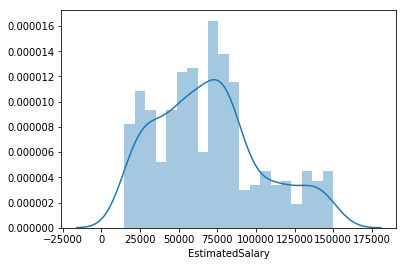

In [66]:
sns.distplot(df.EstimatedSalary, bins = 20)

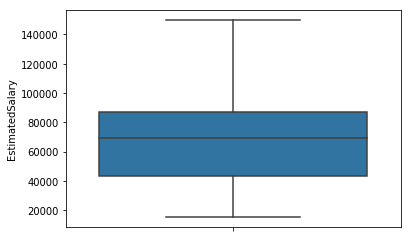

In [67]:
sns.boxplot(x = 'EstimatedSalary', orient = 'vertical', hue = 'Gender', data = df)

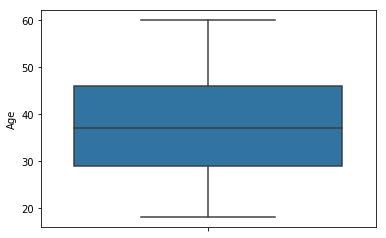

In [68]:
sns.boxplot(x = 'Age', orient = 'vertical', data = df)

#Build Model

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state  = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((317, 3), (80, 3), (317,), (80,))

In [76]:
model = LogisticRegression(C = 10)
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

## Training dataset evaluation

In [84]:
#training classification report

print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       197
           1       0.84      0.69      0.76       120

    accuracy                           0.83       317
   macro avg       0.83      0.81      0.82       317
weighted avg       0.83      0.83      0.83       317



In [85]:
#confusion matrix
confusion_matrix(y_train, model.predict(X_train))

array([[181,  16],
       [ 37,  83]])

## Test set evaluation

In [87]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        58
           1       0.79      0.68      0.73        22

    accuracy                           0.86        80
   macro avg       0.84      0.81      0.82        80
weighted avg       0.86      0.86      0.86        80



In [88]:
confusion_matrix(y_test, model.predict(X_test))

array([[54,  4],
       [ 7, 15]])